# Chapter 12: Data processing and analysis with `pandas`

Robert Johansson

Source code listings for [Numerical Python - Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib](https://www.apress.com/us/book/9781484242452) (ISBN 978-1-484242-45-2).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
# pd.set_option('display.mpl_style', 'default')

In [5]:
import matplotlib as mpl
mpl.style.use('ggplot')

In [6]:
import seaborn as sns

## Series object

In [7]:
s = pd.Series([909976, 8615246, 2872086, 2273305])

In [8]:
s

0     909976
1    8615246
2    2872086
3    2273305
dtype: int64

In [9]:
type(s)

pandas.core.series.Series

In [10]:
s.dtype

dtype('int64')

In [11]:
s.index

RangeIndex(start=0, stop=4, step=1)

In [12]:
s.values

array([ 909976, 8615246, 2872086, 2273305])

In [13]:
s.index = ["Stockholm", "London", "Rome", "Paris"]

In [14]:
s.name = "Population"

In [15]:
s

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [16]:
s = pd.Series([909976, 8615246, 2872086, 2273305], 
              index=["Stockholm", "London", "Rome", "Paris"], name="Population")

In [17]:
s["London"]

8615246

In [18]:
s.Stockholm

909976

In [19]:
s[["Paris", "Rome"]]

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

In [20]:
s.median(), s.mean(), s.std()

(2572695.5, 3667653.25, 3399048.5005155364)

In [21]:
s.min(), s.max()

(909976, 8615246)

In [22]:
s.quantile(q=0.25), s.quantile(q=0.5), s.quantile(q=0.75)

(1932472.75, 2572695.5, 4307876.0)

In [23]:
s.describe()

count    4.000000e+00
mean     3.667653e+06
std      3.399049e+06
min      9.099760e+05
25%      1.932473e+06
50%      2.572696e+06
75%      4.307876e+06
max      8.615246e+06
Name: Population, dtype: float64

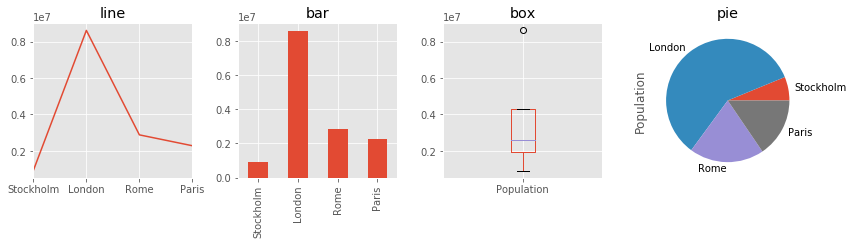

In [24]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3.5))

s.plot(ax=axes[0], kind='line', title="line")
s.plot(ax=axes[1], kind='bar', title="bar")
s.plot(ax=axes[2], kind='box', title="box")
s.plot(ax=axes[3], kind='pie', title="pie")

fig.tight_layout()
fig.savefig("ch12-series-plot.pdf")
fig.savefig("ch12-series-plot.png")

## DataFrame object

In [25]:
df = pd.DataFrame([[909976, 8615246, 2872086, 2273305],
                   ["Sweden", "United kingdom", "Italy", "France"]])

In [26]:
df

,0,1,2,3
0,909976,8615246,2872086,2273305
1,Sweden,United kingdom,Italy,France


In [27]:
df = pd.DataFrame([[909976, "Sweden"],
                   [8615246, "United kingdom"], 
                   [2872086, "Italy"],
                   [2273305, "France"]])

In [28]:
df

,0,1
0,909976,Sweden
1,8615246,United kingdom
2,2872086,Italy
3,2273305,France


In [29]:
df.index = ["Stockholm", "London", "Rome", "Paris"]

In [30]:
df.columns = ["Population", "State"]

In [31]:
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United kingdom
Rome,2872086,Italy
Paris,2273305,France


In [32]:
df = pd.DataFrame([[909976, "Sweden"],
                   [8615246, "United kingdom"], 
                   [2872086, "Italy"],
                   [2273305, "France"]],
                  index=["Stockholm", "London", "Rome", "Paris"],
                  columns=["Population", "State"])

In [33]:
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United kingdom
Rome,2872086,Italy
Paris,2273305,France


In [34]:
df = pd.DataFrame({"Population": [909976, 8615246, 2872086, 2273305],
                   "State": ["Sweden", "United kingdom", "Italy", "France"]},
                  index=["Stockholm", "London", "Rome", "Paris"])

In [35]:
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United kingdom
Rome,2872086,Italy
Paris,2273305,France


In [36]:
df.index

Index(['Stockholm', 'London', 'Rome', 'Paris'], dtype='object')

In [37]:
df.columns

Index(['Population', 'State'], dtype='object')

In [38]:
df.values

array([[909976, 'Sweden'],
       [8615246, 'United kingdom'],
       [2872086, 'Italy'],
       [2273305, 'France']], dtype=object)

In [39]:
df.Population

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [40]:
df["Population"]

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [41]:
type(df.Population)

pandas.core.series.Series

In [42]:
df.Population.Stockholm

909976

In [43]:
type(df.index)

pandas.core.indexes.base.Index

In [44]:
df.loc["Stockholm"]

Population    909976
State         Sweden
Name: Stockholm, dtype: object

In [45]:
type(df.loc["Stockholm"])

pandas.core.series.Series

In [46]:
df.loc[["Paris", "Rome"]]

,Population,State
Paris,2273305,France
Rome,2872086,Italy


In [47]:
df.loc[["Paris", "Rome"], "Population"]

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

In [48]:
df.loc["Paris", "Population"]

2273305

In [49]:
df.mean()

Population    3667653.25
dtype: float64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Stockholm to Paris
Data columns (total 2 columns):
Population    4 non-null int64
State         4 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [51]:
df.dtypes

Population     int64
State         object
dtype: object

In [52]:
df.head()

,Population,State
Stockholm,909976,Sweden
London,8615246,United kingdom
Rome,2872086,Italy
Paris,2273305,France


In [53]:
!head -n5 /home/rob/datasets/european_cities.csv

Rank,City,State,Official population,Date of census/estimate
1,London[2], United Kingdom,"8,615,246",1 June 2014
2,Berlin, Germany,"3,437,916",31 May 2014
3,Madrid, Spain,"3,165,235",1 January 2014
4,Rome, Italy,"2,872,086",30 September 2014


## Larger dataset

In [54]:
df_pop = pd.read_csv("european_cities.csv")

In [55]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014
3,4,Rome,Italy,"2,872,086",30 September 2014
4,5,Paris,France,"2,273,305",1 January 2013


In [56]:
df_pop = pd.read_csv("european_cities.csv", delimiter=",", encoding="utf-8", header=0)

In [57]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
Rank                       105 non-null int64
City                       105 non-null object
State                      105 non-null object
Population                 105 non-null object
Date of census/estimate    105 non-null object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [58]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014
3,4,Rome,Italy,"2,872,086",30 September 2014
4,5,Paris,France,"2,273,305",1 January 2013


In [59]:
df_pop["NumericPopulation"] = df_pop.Population.apply(lambda x: int(x.replace(",", "")))

In [60]:
df_pop["State"].values[:3]

array([' United Kingdom', ' Germany', ' Spain'], dtype=object)

In [61]:
df_pop["State"] = df_pop["State"].apply(lambda x: x.strip())

In [62]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate,NumericPopulation
0,1,London[2],United Kingdom,"8,615,246",1 June 2014,8615246
1,2,Berlin,Germany,"3,437,916",31 May 2014,3437916
2,3,Madrid,Spain,"3,165,235",1 January 2014,3165235
3,4,Rome,Italy,"2,872,086",30 September 2014,2872086
4,5,Paris,France,"2,273,305",1 January 2013,2273305


In [63]:
df_pop.dtypes

Rank                        int64
City                       object
State                      object
Population                 object
Date of census/estimate    object
NumericPopulation           int64
dtype: object

In [64]:
df_pop2 = df_pop.set_index("City")

In [65]:
df_pop2 = df_pop2.sort_index()

In [66]:
df_pop2.head()

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
Aarhus,92,Denmark,"326,676",1 October 2014,326676
Alicante,86,Spain,"334,678",1 January 2012,334678
Amsterdam,23,Netherlands,"813,562",31 May 2014,813562
Antwerp,59,Belgium,"510,610",1 January 2014,510610
Athens,34,Greece,"664,046",24 May 2011,664046


In [67]:
df_pop2.head()

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
Aarhus,92,Denmark,"326,676",1 October 2014,326676
Alicante,86,Spain,"334,678",1 January 2012,334678
Amsterdam,23,Netherlands,"813,562",31 May 2014,813562
Antwerp,59,Belgium,"510,610",1 January 2014,510610
Athens,34,Greece,"664,046",24 May 2011,664046


In [68]:
df_pop3 = df_pop.set_index(["State", "City"]).sort_index(level=0)

In [69]:
df_pop3.head(7)

Rank Population Date of census/estimate  \
State    City                                                    
Austria  Vienna           7  1,794,770          1 January 2015   
Belgium  Antwerp         59    510,610          1 January 2014   
         Brussels[17]    16  1,175,831          1 January 2014   
Bulgaria Plovdiv         84    341,041        31 December 2013   
         Sofia           14  1,291,895        14 December 2014   
         Varna           85    335,819        31 December 2013   
Croatia  Zagreb          24    790,017           31 March 2011   

                       NumericPopulation  
State    City                             
Austria  Vienna                  1794770  
Belgium  Antwerp                  510610  
         Brussels[17]            1175831  
Bulgaria Plovdiv                  341041  
         Sofia                   1291895  
         Varna                    335819  
Croatia  Zagreb                   790017

In [70]:
df_pop3.loc["Sweden"]

,Rank,Population,Date of census/estimate,NumericPopulation
City,,,,
Gothenburg,53,"528,014",31 March 2013,528014
Malmö,102,"309,105",31 March 2013,309105
Stockholm,20,"909,976",31 January 2014,909976


In [71]:
df_pop3.loc[("Sweden", "Gothenburg")]

Rank                                  53
Population                       528,014
Date of census/estimate    31 March 2013
NumericPopulation                 528014
Name: (Sweden, Gothenburg), dtype: object

In [72]:
df_pop.set_index("City").sort_values(["State", "NumericPopulation"], ascending=[False, True]).head()

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
Nottingham,103,United Kingdom,"308,735",30 June 2012,308735
Wirral,97,United Kingdom,"320,229",30 June 2012,320229
Coventry,94,United Kingdom,"323,132",30 June 2012,323132
Wakefield,91,United Kingdom,"327,627",30 June 2012,327627
Leicester,87,United Kingdom,"331,606",30 June 2012,331606


In [73]:
city_counts = df_pop.State.value_counts()

In [74]:
city_counts.name = "# cities in top 105"

In [75]:
df_pop3 = df_pop[["State", "City", "NumericPopulation"]].set_index(["State", "City"])

In [76]:
df_pop4 = df_pop3.sum(level="State").sort_values("NumericPopulation", ascending=False)

In [77]:
df_pop4.head()

,NumericPopulation
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409


In [78]:
df_pop5 = (df_pop.drop("Rank", axis=1)
                 .groupby("State").sum()
                 .sort_values("NumericPopulation", ascending=False))

In [79]:
df_pop5.head()

,NumericPopulation
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409


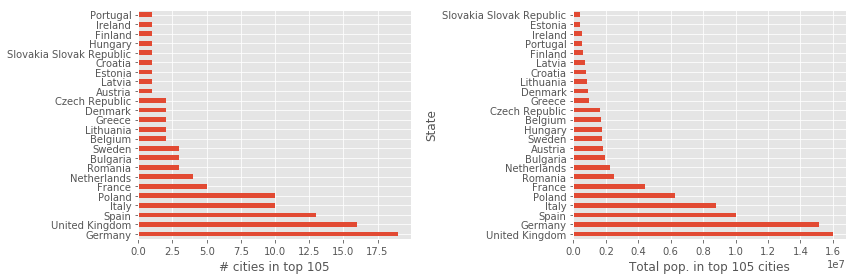

In [80]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

city_counts.plot(kind='barh', ax=ax1)
ax1.set_xlabel("# cities in top 105")
df_pop5.NumericPopulation.plot(kind='barh', ax=ax2)
ax2.set_xlabel("Total pop. in top 105 cities")

fig.tight_layout()
fig.savefig("ch12-state-city-counts-sum.pdf")

## Time series

### Basics

In [81]:
import datetime

In [82]:
pd.date_range("2015-1-1", periods=31)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
               '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
               '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
               '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
               '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-30', '2015-01-31'],
              dtype='datetime64[ns]', freq='D')

In [83]:
pd.date_range(datetime.datetime(2015, 1, 1), periods=31)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
               '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
               '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
               '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
               '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-30', '2015-01-31'],
              dtype='datetime64[ns]', freq='D')

In [84]:
pd.date_range("2015-1-1 00:00", "2015-1-1 12:00", freq="H")

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00',
               '2015-01-01 10:00:00', '2015-01-01 11:00:00',
               '2015-01-01 12:00:00'],
              dtype='datetime64[ns]', freq='H')

In [85]:
ts1 = pd.Series(np.arange(31), index=pd.date_range("2015-1-1", periods=31))

In [86]:
ts1.head()

2015-01-01    0
2015-01-02    1
2015-01-03    2
2015-01-04    3
2015-01-05    4
Freq: D, dtype: int64

In [87]:
ts1["2015-1-3"]

2

In [88]:
ts1.index[2]

Timestamp('2015-01-03 00:00:00', freq='D')

In [89]:
ts1.index[2].year, ts1.index[2].month, ts1.index[2].day

(2015, 1, 3)

In [90]:
ts1.index[2].nanosecond

0

In [91]:
ts1.index[2].to_pydatetime()

datetime.datetime(2015, 1, 3, 0, 0)

In [92]:
ts2 = pd.Series(np.random.rand(2), 
                index=[datetime.datetime(2015, 1, 1), datetime.datetime(2015, 2, 1)])

In [93]:
ts2

2015-01-01    0.431883
2015-02-01    0.794106
dtype: float64

In [94]:
periods = pd.PeriodIndex([pd.Period('2015-01'), pd.Period('2015-02'), pd.Period('2015-03')])

In [95]:
ts3 = pd.Series(np.random.rand(3), periods)

In [96]:
ts3

2015-01    0.102122
2015-02    0.952019
2015-03    0.874310
Freq: M, dtype: float64

In [97]:
ts3.index

PeriodIndex(['2015-01', '2015-02', '2015-03'], dtype='period[M]', freq='M')

In [98]:
ts2.to_period('M')

2015-01    0.431883
2015-02    0.794106
Freq: M, dtype: float64

In [99]:
pd.date_range("2015-1-1", periods=12, freq="M").to_period()

PeriodIndex(['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
             '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12'],
            dtype='period[M]', freq='M')

### Temperature time series example

In [100]:
!head -n 5 temperature_outdoor_2014.tsv

1388530986	4.380000
1388531586	4.250000
1388532187	4.190000
1388532787	4.060000
1388533388	4.060000


In [101]:
df1 = pd.read_csv('temperature_outdoor_2014.tsv', delimiter="\t", names=["time", "outdoor"])

In [102]:
df2 = pd.read_csv('temperature_indoor_2014.tsv', delimiter="\t", names=["time", "indoor"])

In [103]:
df1.head()

,time,outdoor
0,1388530986,4.38
1,1388531586,4.25
2,1388532187,4.19
3,1388532787,4.06
4,1388533388,4.06


In [104]:
df2.head()

,time,indoor
0,1388530986,21.94
1,1388531586,22.00
2,1388532187,22.00
3,1388532787,22.00
4,1388533388,22.00


In [105]:
df1.time = (pd.to_datetime(df1.time.values, unit="s")
              .tz_localize('UTC').tz_convert('Europe/Stockholm'))

In [106]:
df1 = df1.set_index("time")

In [107]:
df2.time = (pd.to_datetime(df2.time.values, unit="s")
              .tz_localize('UTC').tz_convert('Europe/Stockholm'))

In [108]:
df2 = df2.set_index("time")

In [109]:
df1.head()

,outdoor
time,
2014-01-01 00:03:06+01:00,4.38
2014-01-01 00:13:06+01:00,4.25
2014-01-01 00:23:07+01:00,4.19
2014-01-01 00:33:07+01:00,4.06
2014-01-01 00:43:08+01:00,4.06


In [110]:
df1.index[0]

Timestamp('2014-01-01 00:03:06+0100', tz='Europe/Stockholm')

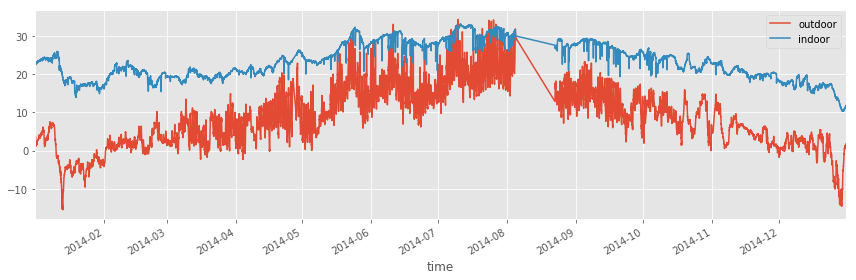

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
df1.plot(ax=ax)
df2.plot(ax=ax)

fig.tight_layout()
fig.savefig("ch12-timeseries-temperature-2014.pdf")

In [112]:
# select january data

In [113]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49548 entries, 2014-01-01 00:03:06+01:00 to 2014-12-30 23:56:35+01:00
Data columns (total 1 columns):
outdoor    49548 non-null float64
dtypes: float64(1)
memory usage: 774.2 KB


In [114]:
df1_jan = df1[(df1.index > "2014-1-1") & (df1.index < "2014-2-1")]

In [115]:
df1.index < "2014-2-1"

array([ True,  True,  True, ..., False, False, False])

In [116]:
df1_jan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4452 entries, 2014-01-01 00:03:06+01:00 to 2014-01-31 23:56:58+01:00
Data columns (total 1 columns):
outdoor    4452 non-null float64
dtypes: float64(1)
memory usage: 69.6 KB


In [117]:
df2_jan = df2["2014-1-1":"2014-1-31"]

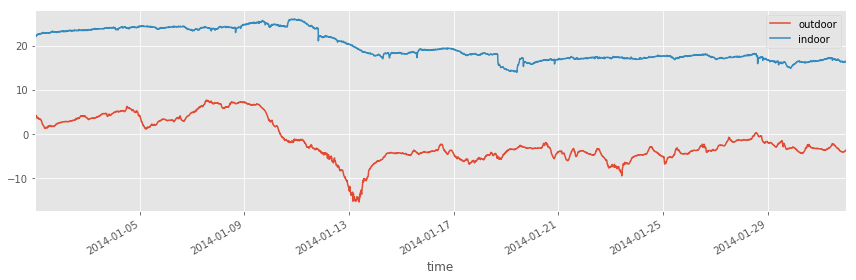

In [118]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

df1_jan.plot(ax=ax)
df2_jan.plot(ax=ax)

fig.tight_layout()
fig.savefig("ch12-timeseries-selected-month.pdf")

In [119]:
# group by month

In [120]:
df1_month = df1.reset_index()

In [121]:
df1_month["month"] = df1_month.time.apply(lambda x: x.month)

In [122]:
df1_month.head()

,time,outdoor,month
0,2014-01-01 00:03:06+01:00,4.38,1
1,2014-01-01 00:13:06+01:00,4.25,1
2,2014-01-01 00:23:07+01:00,4.19,1
3,2014-01-01 00:33:07+01:00,4.06,1
4,2014-01-01 00:43:08+01:00,4.06,1


In [123]:
df1_month = df1_month.groupby("month").aggregate(np.mean)

In [124]:
df2_month = df2.reset_index()

In [125]:
df2_month["month"] = df2_month.time.apply(lambda x: x.month)

In [126]:
df2_month = df2_month.groupby("month").aggregate(np.mean)

In [127]:
df_month = df1_month.join(df2_month)

In [128]:
df_month.head(3)

,outdoor,indoor
month,,
1,-1.776646,19.862590
2,2.231613,20.231507
3,4.615437,19.597748


In [129]:
df_month = pd.concat([df.to_period("M").groupby(level=0).mean() for df in [df1, df2]], axis=1)

/Users/rob/miniconda3/envs/py3.6/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
/Users/rob/miniconda3/envs/py3.6/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


In [130]:
df_month.head(3)

,outdoor,indoor
time,,
2014-01,-1.776646,19.862590
2014-02,2.231613,20.231507
2014-03,4.615437,19.597748


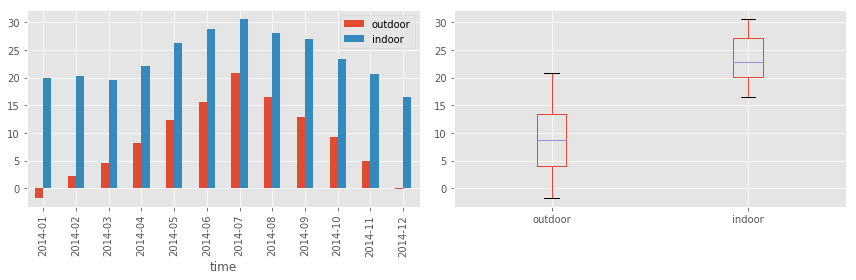

In [131]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df_month.plot(kind='bar', ax=axes[0])
df_month.plot(kind='box', ax=axes[1])

fig.tight_layout()
fig.savefig("ch12-grouped-by-month.pdf")

In [132]:
df_month

,outdoor,indoor
time,,
2014-01,-1.776646,19.862590
2014-02,2.231613,20.231507
2014-03,4.615437,19.597748
2014-04,8.105193,22.149754
2014-05,12.261396,26.332160
2014-06,15.586955,28.687491
2014-07,20.780314,30.605333
2014-08,16.494823,28.099068
2014-09,12.823905,26.950366


In [133]:
# resampling

In [134]:
df1_hour = df1.resample("H").mean()

In [135]:
df1_hour.columns = ["outdoor (hourly avg.)"]

In [136]:
df1_day = df1.resample("D").mean()

In [137]:
df1_day.columns = ["outdoor (daily avg.)"]

In [138]:
df1_week = df1.resample("7D").mean()

In [139]:
df1_week.columns = ["outdoor (weekly avg.)"]

In [140]:
df1_month = df1.resample("M").mean()

In [141]:
df1_month.columns = ["outdoor (monthly avg.)"]

In [142]:
df_diff = (df1.resample("D").mean().outdoor - df2.resample("D").mean().indoor)

/Users/rob/miniconda3/envs/py3.6/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


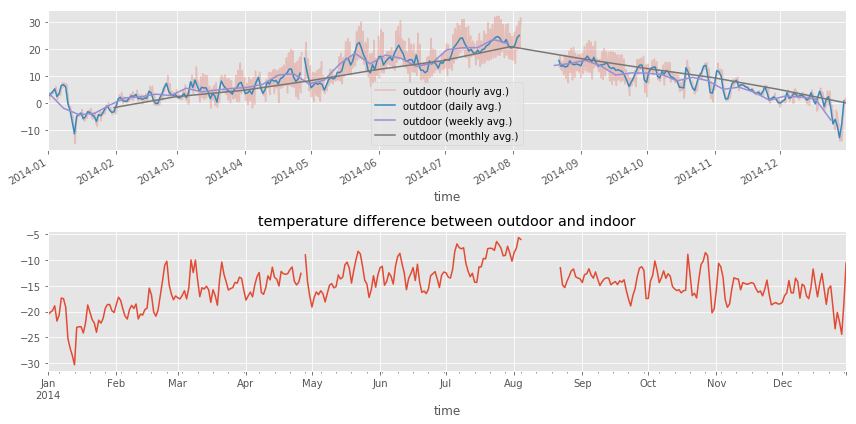

In [143]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

df1_hour.plot(ax=ax1, alpha=0.25)
df1_day.plot(ax=ax1)
df1_week.plot(ax=ax1)
df1_month.plot(ax=ax1)

df_diff.plot(ax=ax2)
ax2.set_title("temperature difference between outdoor and indoor")

fig.tight_layout()
fig.savefig("ch12-timeseries-resampled.pdf")

In [144]:
pd.concat([df1.resample("5min").mean().rename(columns={"outdoor": 'None'}),
           df1.resample("5min").ffill().rename(columns={"outdoor": 'ffill'}),
           df1.resample("5min").bfill().rename(columns={"outdoor": 'bfill'})], axis=1).head()

,None,ffill,bfill
time,,,
2014-01-01 00:00:00+01:00,4.38,NaN,4.38
2014-01-01 00:05:00+01:00,NaN,4.38,4.25
2014-01-01 00:10:00+01:00,4.25,4.38,4.25
2014-01-01 00:15:00+01:00,NaN,4.25,4.19
2014-01-01 00:20:00+01:00,4.19,4.25,4.19


## Selected day

In [145]:
df1_dec25 = df1[(df1.index < "2014-9-1") & (df1.index >= "2014-8-1")].resample("D")

In [146]:
df1_dec25 = df1.loc["2014-12-25"]

In [147]:
df1_dec25.head(5)

,outdoor
time,
2014-12-25 00:01:45+01:00,-4.88
2014-12-25 00:11:45+01:00,-4.94
2014-12-25 00:21:46+01:00,-5.06
2014-12-25 00:31:47+01:00,-5.06
2014-12-25 00:41:47+01:00,-5.12


In [148]:
df2_dec25 = df2.loc["2014-12-25"]

In [149]:
df2_dec25.head(5)

,indoor
time,
2014-12-25 00:01:45+01:00,16.31
2014-12-25 00:11:45+01:00,16.25
2014-12-25 00:21:46+01:00,16.31
2014-12-25 00:31:47+01:00,16.31
2014-12-25 00:41:47+01:00,16.25


In [150]:
df1_dec25.describe().T

,count,mean,std,min,25%,50%,75%,max
outdoor,144.0,-7.788819,1.456085,-10.06,-9.075,-7.75,-6.8625,-4.88


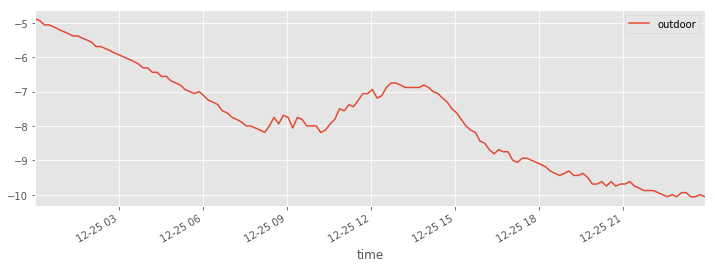

In [151]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

df1_dec25.plot(ax=ax)

fig.savefig("ch12-timeseries-selected-month.pdf")

In [152]:
df1.index

DatetimeIndex(['2014-01-01 00:03:06+01:00', '2014-01-01 00:13:06+01:00',
               '2014-01-01 00:23:07+01:00', '2014-01-01 00:33:07+01:00',
               '2014-01-01 00:43:08+01:00', '2014-01-01 00:53:08+01:00',
               '2014-01-01 01:03:09+01:00', '2014-01-01 01:13:09+01:00',
               '2014-01-01 01:23:10+01:00', '2014-01-01 01:33:26+01:00',
               ...
               '2014-12-30 22:26:30+01:00', '2014-12-30 22:36:31+01:00',
               '2014-12-30 22:46:31+01:00', '2014-12-30 22:56:32+01:00',
               '2014-12-30 23:06:32+01:00', '2014-12-30 23:16:33+01:00',
               '2014-12-30 23:26:33+01:00', '2014-12-30 23:36:34+01:00',
               '2014-12-30 23:46:35+01:00', '2014-12-30 23:56:35+01:00'],
              dtype='datetime64[ns, Europe/Stockholm]', name='time', length=49548, freq=None)

# Seaborn statistical visualization library

In [153]:
sns.set(style="darkgrid")

In [154]:
#sns.set(style="whitegrid")

In [155]:
df1 = pd.read_csv('temperature_outdoor_2014.tsv', delimiter="\t", names=["time", "outdoor"])
df1.time = pd.to_datetime(df1.time.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm')

df1 = df1.set_index("time").resample("10min").mean()
df2 = pd.read_csv('temperature_indoor_2014.tsv', delimiter="\t", names=["time", "indoor"])
df2.time = pd.to_datetime(df2.time.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm')
df2 = df2.set_index("time").resample("10min").mean()
df_temp = pd.concat([df1, df2], axis=1)

/Users/rob/miniconda3/envs/py3.6/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


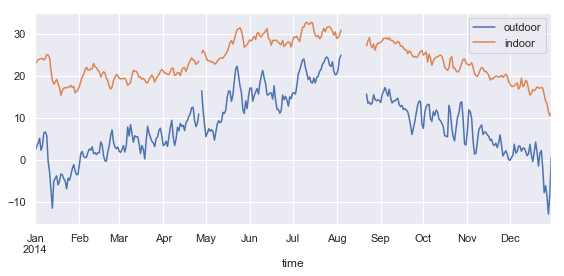

In [156]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
df_temp.resample("D").mean().plot(y=["outdoor", "indoor"], ax=ax)
fig.tight_layout()
fig.savefig("ch12-seaborn-plot.pdf")

In [157]:
#sns.kdeplot(df_temp["outdoor"].dropna().values, shade=True, cumulative=True);

/Users/rob/miniconda3/envs/py3.6/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
/Users/rob/miniconda3/envs/py3.6/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


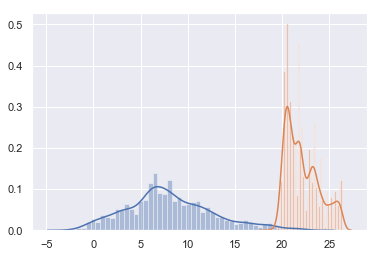

In [158]:
sns.distplot(df_temp.to_period("M")["outdoor"]["2014-04"].dropna().values, bins=50);
sns.distplot(df_temp.to_period("M")["indoor"]["2014-04"].dropna().values, bins=50);

plt.savefig("ch12-seaborn-distplot.pdf")

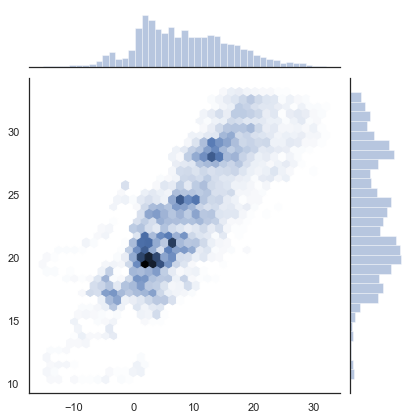

In [159]:
with sns.axes_style("white"):
    sns.jointplot(df_temp.resample("H").mean()["outdoor"].values,
                  df_temp.resample("H").mean()["indoor"].values, kind="hex");
    
plt.savefig("ch12-seaborn-jointplot.pdf")

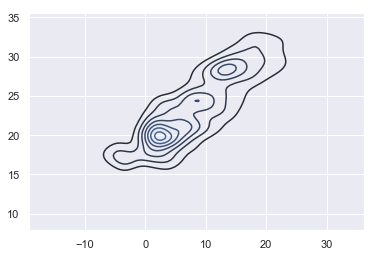

In [160]:
sns.kdeplot(df_temp.resample("H").mean()["outdoor"].dropna().values,
            df_temp.resample("H").mean()["indoor"].dropna().values, shade=False);

plt.savefig("ch12-seaborn-kdeplot.pdf")

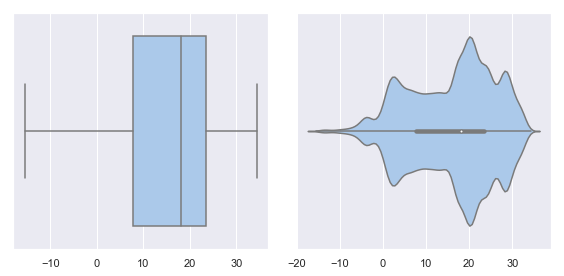

In [161]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

sns.boxplot(df_temp.dropna(), ax=ax1, palette="pastel")
sns.violinplot(df_temp.dropna(), ax=ax2, palette="pastel")

fig.tight_layout()
fig.savefig("ch12-seaborn-boxplot-violinplot.pdf")

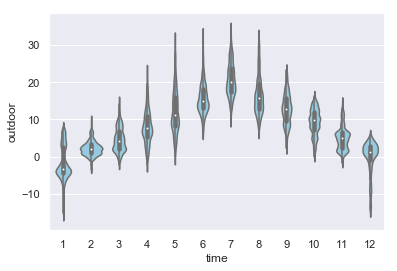

In [162]:
sns.violinplot(x=df_temp.dropna().index.month, y=df_temp.dropna().outdoor, color="skyblue");

plt.savefig("ch12-seaborn-violinplot.pdf")

In [163]:
df_temp["month"] = df_temp.index.month
df_temp["hour"] = df_temp.index.hour

In [164]:
df_temp.head()

,outdoor,indoor,month,hour
time,,,,
2014-01-01 00:00:00+01:00,4.38,21.94,1,0
2014-01-01 00:10:00+01:00,4.25,22.00,1,0
2014-01-01 00:20:00+01:00,4.19,22.00,1,0
2014-01-01 00:30:00+01:00,4.06,22.00,1,0
2014-01-01 00:40:00+01:00,4.06,22.00,1,0


In [165]:
table = pd.pivot_table(df_temp, values='outdoor', index=['month'], columns=['hour'], aggfunc=np.mean)

In [166]:
table

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
month,,,,,,,,,,,,,,,,,,,,,
1,-1.692312,-1.750162,-1.826649,-1.879086,-1.922527,-1.968065,-2.020914,-2.035806,-2.101774,-2.001022,...,-1.457849,-1.696935,-1.814194,-1.812258,-1.853297,-1.898432,-1.839730,-1.806486,-1.854462,-1.890811
2,1.613690,1.521190,1.479405,1.464371,1.506407,1.485595,1.499167,1.516946,1.669226,2.067725,...,3.573593,3.360741,2.939390,2.501607,2.357425,2.236190,2.204458,2.137619,2.024671,1.896190
3,3.192366,2.866774,2.628000,2.524140,2.384140,2.235538,2.243387,2.622258,3.419301,4.466290,...,7.790323,7.930914,7.595892,6.770914,5.731508,4.983784,4.437419,4.022312,3.657903,3.407258
4,5.832738,5.336012,4.926667,4.597059,4.380000,4.109769,4.123699,4.741437,5.878035,7.272299,...,12.175556,12.500059,12.494483,12.361156,11.989240,10.454881,8.857619,7.712619,6.974762,6.293512
5,9.792204,9.369351,9.009839,8.670914,8.463387,8.446919,8.772324,9.562742,10.723622,12.047717,...,15.542581,15.744624,15.784839,15.799570,17.009892,15.685161,13.632796,12.216290,11.291237,10.622849
6,13.209556,12.792889,12.382889,11.967889,11.735778,11.886667,12.503778,13.338167,14.343444,15.665475,...,18.630556,18.866292,18.680611,18.529832,20.057877,18.853389,16.969777,15.675111,14.658778,13.898167
7,17.956344,17.348641,16.793152,16.309892,16.001559,15.986774,16.506613,17.478226,18.850054,20.533763,...,24.598441,25.030000,24.869194,24.764409,26.155161,24.896505,22.550269,20.882649,19.699022,18.822634
8,14.498205,13.960128,13.555128,12.995641,12.651410,12.485974,12.680130,13.403506,14.578780,16.170833,...,20.473810,20.292381,20.328795,19.642436,19.373846,18.713462,17.034872,15.843590,15.146154,14.596667
9,11.133000,10.725667,10.362444,9.976833,9.729333,9.503944,9.357500,9.689778,10.600778,11.829106,...,16.336983,16.828268,17.031056,16.786983,15.853556,14.534637,13.350444,12.545278,11.954190,11.399056


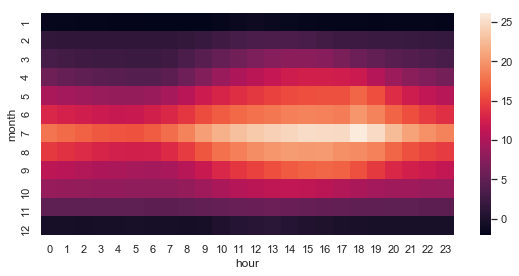

In [167]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.heatmap(table, ax=ax);

fig.tight_layout()
fig.savefig("ch12-seaborn-heatmap.pdf")

## Versions

In [168]:
%reload_ext version_information

In [169]:
%version_information numpy, matplotlib, pandas, seaborn

Software versions
Python 3.6.8 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 7.5.0
OS Darwin 18.2.0 x86_64 i386 64bit
numpy 1.16.3
matplotlib 3.0.3
pandas 0.24.2
seaborn 0.9.0
Mon May 06 15:39:35 2019 JST